# Keras Convolutional Neural Network

#### *fashion_mnist* dataset

For this homework assignment, you are asked to build a neural network classifier on the FasionMNIST dataset. The FashionMNIST dataset has a lot in common with the MNIST dataset:
- The dataset contains 70,000 grayscale images, split into training set (60,000 images) and test set (10,000 images).
- The resolution of images is 28 by 28 pixels.
- There are a total of 10 target labels.

<img src="https://tensorflow.org/images/fashion-mnist-sprite.png" width="600">

In [1]:
import numpy as np
import tensorflow as tf
print("Version: ", tf.__version__)

Version:  2.3.0


In [2]:
# Import the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
# Here are the list of class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Please complete the following tasks:
1. Scale the values to [0, 1] by dividing every value by 255.0.
2. Use `plt.imshow()` to display the first image from the training set.
3. Build a neural network with three layers:
    - The first layer is a flatten layer of size 28 * 28.
    - The second layer is a dense layer with 128 nodes, with ReLU as activation function.
    - The last layer is a dense layer with 10 nodes without activation.
4. Compile the model, using `adam` as optimizer and `tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)` as loss function. Use `accuracy` as performance metrics.
5. Train the model using `train_images` and `train_labels` for 10 epochs.
6. Evaluate the accuracy on the test set.
7. Compute the confusion matrix over test set. Which type of prediction mistake occurs most frequently?

In [4]:
# 1.

In [5]:
train_images, test_images = train_images / 255.0, test_images / 255.0


print(train_images.shape, test_images.shape)

(60000, 28, 28) (10000, 28, 28)


In [6]:
# 2.

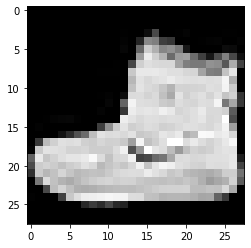

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train_images[0], cmap='gray')

In [8]:
# 3.

In [9]:
# Build CNN model
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28, 28, 1)))

model.add(tf.keras.layers.Dense(units=128,
                       activation='relu'))

model.add(tf.keras.layers.Dense(units=10,
                       activation=None))

In [10]:
# 4.

In [11]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [12]:
# 5.

In [13]:
history =  model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5007 - accuracy: 0.8257: 0s - loss:
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3788 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3380 - accuracy: 0.8786
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3177 - accuracy: 0.8841
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2962 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2822 - accuracy: 0.8958
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2692 - accuracy: 0.9006
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2586 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2474 - accuracy: 0.9065
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step -

In [14]:
# 6.

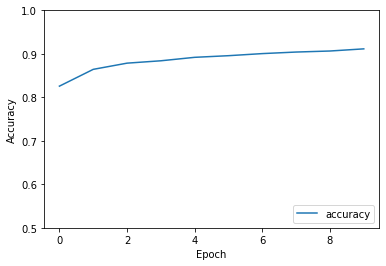

In [15]:
# Evaluate the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [16]:
# 7.

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
test_labels_pred = []
raw_predictions = model(test_images).numpy()
for row_idx in range(raw_predictions.shape[0]):
    logits = raw_predictions[row_idx, :]
    probs = tf.nn.softmax(logits).numpy()
    class_pred = np.argmax(probs)
    test_labels_pred.append(class_pred)
print(test_labels_pred)

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 2, 8, 0, 2, 5, 7, 5, 1, 2, 6, 0, 9, 4, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 6, 7, 6, 7, 2, 1, 2, 6, 4, 2, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1, 2, 4, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 2, 5, 3, 6, 7, 1, 8, 0, 1, 4, 2, 3, 6, 7, 6, 7, 8, 5, 7, 9, 4, 2, 5, 7, 0, 5, 2, 8, 6, 7, 8, 0, 0, 9, 9, 3, 0, 8, 2, 1, 5, 4, 1, 9, 1, 8, 4, 6, 1, 2, 5, 1, 3, 0, 0, 1, 6, 1, 3, 2, 2, 3, 6, 1, 3, 5, 0, 4, 7, 9, 3, 7, 2, 3, 9, 0, 9, 2, 7, 4, 2, 0, 5, 6, 1, 2, 1, 3, 0, 9, 1, 0, 9, 3, 6, 7, 9, 9, 4, 4, 7, 1, 2, 3, 6, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3, 1, 6, 7, 2, 8, 5, 2, 0, 7, 7, 6, 6, 7, 6, 7, 8, 9, 2, 9, 0, 5, 1, 4, 2, 5, 2, 9, 2, 2, 8, 6, 2, 2, 2, 9, 7, 6, 5, 5, 2, 8, 5, 2, 3, 0, 4, 8, 0, 0, 6, 3, 8, 9, 6, 1, 3, 0, 2, 3, 0, 8, 3, 7, 4, 0, 1, 2, 4, 0, 6, 6, 7, 5, 4, 5, 9, 5, 6, 5, 5, 1, 9, 8, 8, 3, 3, 6, 8, 0, 0, 2, 9, 7, 7, 1, 3, 6, 6, 6, 4, 7, 1, 6, 4, 8, 2, 6, 5, 6, 2, 7, 7, 7, 3, 3, 7, 0, 

In [19]:
mat = confusion_matrix(test_labels, test_labels_pred)
print(mat)

[[832   0  16  38   3   1 105   0   5   0]
 [  3 959   2  27   5   0   4   0   0   0]
 [ 16   0 804  15  73   0  92   0   0   0]
 [ 16   2  14 910  36   0  19   0   3   0]
 [  0   0 100  23 797   0  79   0   1   0]
 [  0   0   0   1   0 947   0  39   1  12]
 [100   1  67  44  62   0 721   0   5   0]
 [  0   0   0   0   0   4   0 983   0  13]
 [  4   1   5   3   3   1  13   4 966   0]
 [  0   0   0   0   0   5   1  48   0 946]]


In [1]:
print("The type of prediction mistake which occurs most frequently is in the first row (T-shirt/top), and seventh column (Shirt), occuring 105 times.")

The type of prediction mistake which occurs most frequently is in the first row (T-shirt/top), and seventh column (Shirt), occuring 105 times.
